In [1]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util
from google.colab import drive
import random

In [6]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Define the path to your image
image_path = '/content/drive/MyDrive/Quiz1 pcd/avatar-the-last-airbender-3.jpeg'  # Adjust this path to your image's path


In [9]:
# Read the image from Google Drive and convert to grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

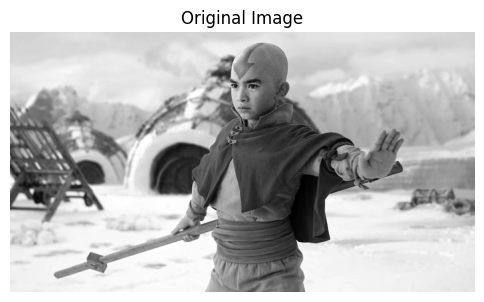

In [10]:
# Display original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [11]:
# Find image dimensions (width and height)
height, width = image.shape
print(f"Width: {width}, Height: {height}")

Width: 700, Height: 392


In [12]:
# Find the maximum and minimum pixel values
max_pixel_value = np.max(image)
min_pixel_value = np.min(image)
print(f"Maximum pixel value: {max_pixel_value}, Minimum pixel value: {min_pixel_value}")


Maximum pixel value: 255, Minimum pixel value: 0


In [13]:
# Normalize the pixel values from 0-255 to 0-1
normalized_image = image / 255.0

In [14]:
# Perform horizontal and vertical flips
flip_horizontal = np.fliplr(normalized_image)
flip_vertical = np.flipud(normalized_image)

In [15]:
# Add Gaussian noise and Salt-and-Pepper noise
noise_gaussian = util.random_noise(normalized_image, mode='gaussian')
noise_salt_pepper = util.random_noise(normalized_image, mode='s&p')

In [16]:
# Function to perform a random crop
def random_crop(img, crop_size=(250, 250)):
    max_x = img.shape[1] - crop_size[1]
    max_y = img.shape[0] - crop_size[0]
    x = np.random.randint(0, max_x)
    y = np.random.randint(0, max_y)
    crop = img[y:y+crop_size[0], x:x+crop_size[1]]
    return crop

In [17]:
# Function to perform a center crop
def center_crop(img, crop_size=(250, 250)):
    center_x, center_y = img.shape[1] // 2, img.shape[0] // 2
    crop_x, crop_y = crop_size[1] // 2, crop_size[0] // 2
    crop = img[center_y - crop_y:center_y + crop_y, center_x - crop_x:center_x + crop_x]
    return crop

In [18]:
# Perform random and center crops
random_crop_image = random_crop(normalized_image)
center_crop_image = center_crop(normalized_image)

(-0.5, 249.5, 249.5, -0.5)

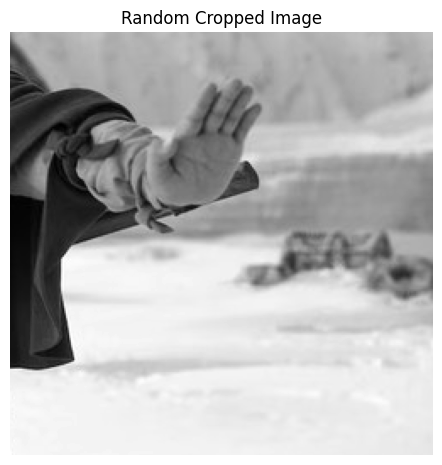

In [19]:
# Show the center cropped image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(random_crop_image, cmap='gray')
plt.title('Random Cropped Image')
plt.axis('off')

(-0.5, 249.5, 249.5, -0.5)

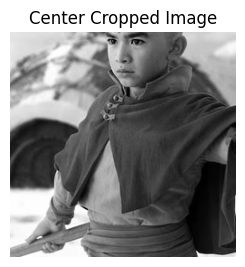

In [20]:
plt.subplot(1, 2, 2)
plt.imshow(center_crop_image, cmap='gray')
plt.title('Center Cropped Image')
plt.axis('off')

In [21]:
plt.show()